In [72]:
import pandas as pd
import joblib
import os
import numpy as np

from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

In [19]:
import sys
sys.path.append('../')  # Adjust the path based on your project structure
from pre_processing.const import FEATURE_NAMES

In [4]:
loaded_y_test = joblib.load('y_test.joblib')
loaded_X_test = joblib.load('X_test.joblib')


In [7]:
# Load the MultiOutputClassifier
loaded_multi_label_svm = joblib.load('multi_label_svm_model.joblib')

# Load the input features and target labels
# loaded_X = joblib.load('input_features.joblib')
# loaded_y = joblib.load('target_labels.joblib')

# Load the train/test splits
# loaded_X_train = joblib.load('X_train.joblib')
# loaded_X_test = joblib.load('X_test.joblib')
# loaded_y_train = joblib.load('y_train.joblib')
# loaded_y_test = joblib.load('y_test.joblib')

In [8]:
# Make predictions on the test set
predictions = loaded_multi_label_svm.predict(loaded_X_test)

# # Evaluate the performance (accuracy in this example)
# accuracy = accuracy_score(loaded_y_test, predictions)
# print("Accuracy:", accuracy)

/tmp/ipykernel_2130648/1448942465.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


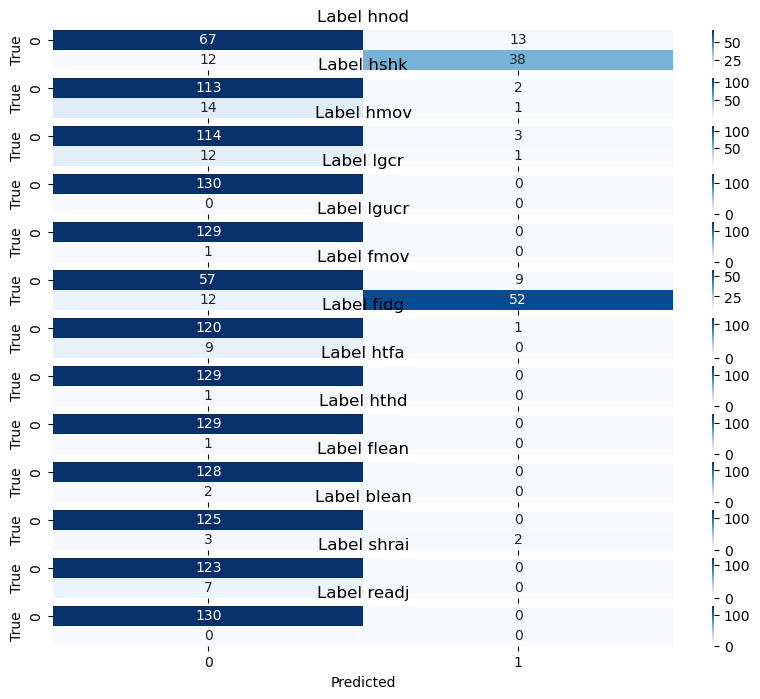

Classification Report:
 {'0': {'precision': 0.7450980392156863, 'recall': 0.76, 'f1-score': 0.7524752475247525, 'support': 50.0}, '1': {'precision': 0.3333333333333333, 'recall': 0.06666666666666667, 'f1-score': 0.1111111111111111, 'support': 15.0}, '2': {'precision': 0.25, 'recall': 0.07692307692307693, 'f1-score': 0.11764705882352941, 'support': 13.0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '5': {'precision': 0.8524590163934426, 'recall': 0.8125, 'f1-score': 0.8319999999999999, 'support': 64.0}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9.0}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0}, '10': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285715, 'support': 5.0}, '11': {'p

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
conf_mat = multilabel_confusion_matrix(loaded_y_test, predictions)
# Visualize the confusion matrix
NUM_CLASSES = len(FEATURE_NAMES)
fig, axes = plt.subplots(nrows=NUM_CLASSES, ncols=1, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Label {FEATURE_NAMES[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()



In [101]:
# Summarize metrics using classification report
classification_rep = classification_report(loaded_y_test, predictions, output_dict=True, target_names=FEATURE_NAMES)
df_report = pd.DataFrame.from_dict(classification_rep).transpose()
# index_mapping = {str(idx): feature_name for idx, feature_name in enumerate(FEATURE_NAMES)}
# df_report.rename(index=index_mapping, inplace=True)
df_report

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
hnod,0.745098,0.760000,0.752475,50.0
hshk,0.333333,0.066667,0.111111,15.0
hmov,0.250000,0.076923,0.117647,13.0
lgcr,0.000000,0.000000,0.000000,0.0
lgucr,0.000000,0.000000,0.000000,1.0
fmov,0.852459,0.812500,0.832000,64.0
fidg,0.000000,0.000000,0.000000,9.0
htfa,0.000000,0.000000,0.000000,1.0
hthd,0.000000,0.000000,0.000000,1.0
flean,0.000000,0.000000,0.000000,2.0


In [93]:
type(classification_rep)

dict

Unique classes in ground truth: [ 0  1  2  4  5  6  7 10 11]
Unique classes in predictions: [ 0  1  2  5 10]
Confusion matrix shape: (13, 13)


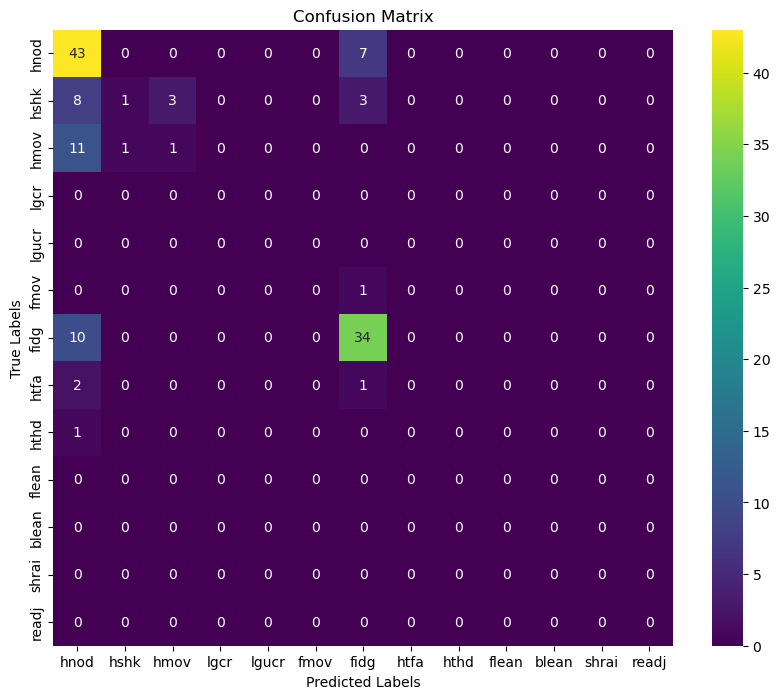

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

NUM_CLASSES = len(FEATURE_NAMES)
# Check the unique classes in the ground truth and predictions
unique_classes_ground_truth = np.unique(np.argmax(loaded_y_test, axis=1))
unique_classes_predictions = np.unique(np.argmax(predictions, axis=1))

print("Unique classes in ground truth:", unique_classes_ground_truth)
print("Unique classes in predictions:", unique_classes_predictions)

# Determine missing classes
missing_classes = set(range(NUM_CLASSES)) - set(unique_classes_ground_truth)

# Create a mapping for classes
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes_ground_truth)}

# Calculate the confusion matrix
conf_matrix = confusion_matrix(
    np.argmax(loaded_y_test, axis=1),
    np.argmax(predictions, axis=1),
    labels=list(class_mapping.values())  # Specify the labels to ensure consistent order
)

# Add rows and columns for missing classes
for missing_class in missing_classes:
    conf_matrix = np.insert(conf_matrix, missing_class, 0, axis=0)
    conf_matrix = np.insert(conf_matrix, missing_class, 0, axis=1)

# Print the shape of the confusion matrix
print("Confusion matrix shape:", conf_matrix.shape)

# Plot the confusion matrix as a heatmap with feature names
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=FEATURE_NAMES, yticklabels=FEATURE_NAMES)

# Set axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [33]:
feature_index_map

{0: 0, 1: 1, 2: 2, 4: 3, 5: 4, 6: 5, 7: 6, 10: 7, 11: 8}

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming 'predictions' and 'loaded_y_test' are your arrays
# 'FEATURE_NAMES' is a list containing the feature names
# Replace 'predictions', 'loaded_y_test', and 'FEATURE_NAMES' with your actual data

# Check the unique classes in the ground truth and predictions
unique_classes_ground_truth = np.unique(np.argmax(loaded_y_test, axis=1))
unique_classes_predictions = np.unique(np.argmax(predictions, axis=1))

print("Unique classes in ground truth:", unique_classes_ground_truth)
print("Unique classes in predictions:", unique_classes_predictions)

# Determine the number of classes dynamically
NUM_CLASSES = len(FEATURE_NAMES)

# Create a dictionary to map indices in FEATURE_NAMES to confusion matrix indices
feature_index_map = {feature_idx: idx for idx, feature_idx in enumerate(unique_classes_ground_truth)}

# Initialize lists to store metrics for each feature
feature_names = []
true_positives = []
false_positives = []
false_negatives = []
true_negatives = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

# Loop through each feature
for feature_ind, feature_name in enumerate(FEATURE_NAMES):
    # Get the corresponding index in the confusion matrix
    feature_idx_conf_matrix = feature_index_map.get(feature_ind, None)

    if feature_idx_conf_matrix is None:
        # Handle the case where the class is missing in the ground truth
        tp, fp, fn, tn = np.nan, np.nan, np.nan, np.nan
        accuracy, recall, precision, f1 = np.nan, np.nan, np.nan, np.nan
    else:
        # Extract relevant rows and columns from the confusion matrix for the current feature
        tp = conf_matrix[feature_idx_conf_matrix, feature_idx_conf_matrix]
        fp = np.sum(conf_matrix[:, feature_idx_conf_matrix]) - tp
        fn = np.sum(conf_matrix[feature_idx_conf_matrix, :]) - tp
        tn = np.sum(conf_matrix) - tp - fp - fn

        # Calculate metrics
        # Calculate metrics
        total_instances = tp + fp + fn + tn
        accuracy = (tp + tn) / total_instances if not np.isnan(total_instances) and total_instances > 0 else np.nan
        recall = tp / (tp + fn) if not np.isnan(tp + fn) and (tp + fn) > 0 else np.nan
        precision = tp / (tp + fp) if not np.isnan(tp + fp) and (tp + fp) > 0 else np.nan
        f1 = 2 * (precision * recall) / (precision + recall) if not np.isnan(precision + recall) and (precision + recall) > 0 else np.nan

    # Append metrics to lists
     # Append metrics to lists
    feature_names.append(feature_name)
    true_positives.append(int(tp) if not np.isnan(tp) else np.nan)
    false_positives.append(int(fp) if not np.isnan(fp) else np.nan)
    false_negatives.append(int(fn) if not np.isnan(fn) else np.nan)
    true_negatives.append(int(tn) if not np.isnan(tn) else np.nan)
    accuracy_list.append(round(accuracy, 3) if not np.isnan(accuracy) else np.nan)
    recall_list.append(round(recall, 3) if not np.isnan(recall) else np.nan)
    precision_list.append(round(precision, 3) if not np.isnan(precision) else np.nan)
    f1_score_list.append(round(f1, 3) if not np.isnan(f1) else np.nan)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Feature': feature_names,
    'True Positives': true_positives,
    'False Positives': false_positives,
    'False Negatives': false_negatives,
    'True Negatives': true_negatives,
    'Accuracy': accuracy_list,
    'Recall': recall_list,
    'Precision': precision_list,
    'F1 Score': f1_score_list
})

# Display the DataFrame
metrics_df


Unique classes in ground truth: [ 0  1  2  4  5  6  7 10 11]
Unique classes in predictions: [ 0  1  2  5 10]


,Feature,True Positives,False Positives,False Negatives,True Negatives,Accuracy,Recall,Precision,F1 Score
0,hnod,43.0,34.0,7.0,46.0,0.685,0.860,0.558,0.677
1,hshk,1.0,1.0,14.0,114.0,0.885,0.067,0.500,0.118
2,hmov,1.0,3.0,12.0,114.0,0.885,0.077,0.250,0.118
3,lgcr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lgucr,0.0,0.0,1.0,129.0,0.992,0.000,NaN,NaN
5,fmov,34.0,12.0,10.0,74.0,0.831,0.773,0.739,0.756
6,fidg,0.0,0.0,3.0,127.0,0.977,0.000,NaN,NaN
7,htfa,0.0,0.0,1.0,129.0,0.992,0.000,NaN,NaN
8,hthd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,flean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Print debugging information
print("Number of classes:", NUM_CLASSES)
print("Confusion matrix shape:", conf_matrix.shape)
print("Feature index:", feature_idx)

Number of classes: 12
Confusion matrix shape: (9, 9)
Feature index: 10
